# Introduction to Machine Learning (CSCI-UA.473)

## Linear Models for Regression and Classification

## Question P1: Linear Regression (20 points total)

A linear regression model is a linear function of the parameters of the model. Its output $y$ is a real number or a real vector, depending on the task definition. That is: 
$$
y = w \cdot x
$$

Implement, train, and test a linear regression model to predict the values of PSA. 

The dataset can be found here: https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.data 
The necessary information associated with the dataset can be found here: https://web.stanford.edu/~hastie/ElemStatLearn/datasets/prostate.info.txt

Note that the last column indicates which observations belong to the training set and which ones belong to the test set. For the purpose of this exercise use the test set as your "validation" set. 

### P1.a: Loading the data, implementing the model, and finding the solution (10 points)

#### Dataset ###
Load the dataset and split it into train and validation sets. 

In [2]:
import pandas as pd
from tqdm import tqdm
import autograd.numpy as np
import matplotlib.pyplot as plt
from autograd import grad, elementwise_grad

dat_psa = pd.read_csv("prostate.csv",sep=",")

train = dat_psa['Train'] == "T"
train_psa = dat_psa[train]
test_psa = dat_psa[~train]

#### Implement the model, find the solution ###
1. Find the closed form solution and report the numbers on the validation set. 
2. Find another solution using LinearRegression module of scikit-learn and report any difference in numbers. 

In [2]:
import sklearn
from sklearn.linear_model import LinearRegression

#Define the X and Y
X = train_psa.iloc[:, 1:9]
Y = train_psa.iloc[:, 9]

#Create our closed form solution
X_mat = train_psa.iloc[:, 1:9].to_numpy()
Y_vec = train_psa.iloc[:, 9].to_numpy()
X_mat.transpose()
B_vec = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X_mat),X_mat)), np.transpose(X_mat)), Y_vec)

#Use sklearn to create the model
sk_model = LinearRegression()
sk_model.fit(X,Y)

#Predict the Validation Set Results
val_X = test_psa.iloc[:, 1:9]
val_Y = test_psa.iloc[:, 9]
sk_Y = sk_model.predict(val_X)
val_X_tr = np.transpose(val_X.to_numpy())
cf_Y = np.dot(B_vec, val_X_tr)

#Check RSS
from sklearn.metrics import r2_score
sk_score = r2_score(val_Y, sk_Y)
cf_score = r2_score(val_Y, cf_Y)

sk_score, cf_score

(0.5033798502381801, 0.5065276973976196)

### P1.b: Implement Ridge and Lasso regression (5 + 5 = 10 points)

#### Ridge Regression
Implement the Ridge regression and plot the values of coefficients for different values of the effective degrees of freedom $df(\lambda)$: 

$$
df(\lambda) = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
$$

Where the effective degrees of freedom $df(\lambda)$ is defined as: 

$$ 
df(\lambda) = trace \left[{\bf X}({\bf X}^T {\bf X} +  \lambda {\bf I})^{-1} {\bf X}^T \right]
$$

[0    0.570626
1    0.646121
2   -0.018099
3    0.138336
4    0.741377
5   -0.206830
6    0.011973
7    0.008744
dtype: float64, 0    0.568265
1    0.616976
2   -0.016649
3    0.137391
4    0.643251
5   -0.183007
6    0.018918
7    0.008539
dtype: float64, 0    0.564127
1    0.589340
2   -0.015296
3    0.137134
4    0.570305
5   -0.163392
6    0.025321
7    0.008345
dtype: float64, 0    0.558949
1    0.563653
2   -0.014030
3    0.137205
4    0.513780
5   -0.146735
6    0.031008
7    0.008167
dtype: float64, 0    0.553153
1    0.539965
2   -0.012841
3    0.137422
4    0.468591
5   -0.132279
6    0.035966
7    0.008010
dtype: float64, 0    0.546998
1    0.518174
2   -0.011722
3    0.137688
4    0.431569
5   -0.119535
6    0.040242
7    0.007871
dtype: float64, 0    0.540650
1    0.498127
2   -0.010665
3    0.137951
4    0.400639
5   -0.108162
6    0.043908
7    0.007751
dtype: float64, 0    0.534215
1    0.479656
2   -0.009664
3    0.138183
4    0.374379
5   -0.097919
6    0.047034
7    

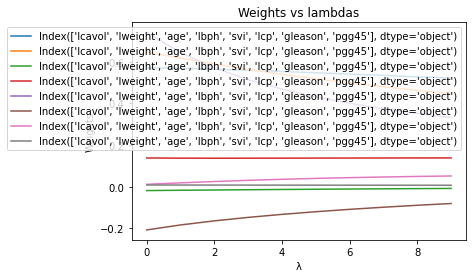

In [3]:
lambs = [0,1,2,3,4,5,6,7,8,9]
w_ridge = []
df_ridge = []

for i in lambs:
    df_ridge.append(np.trace(np.dot((X @ np.linalg.inv(X.T @ X + (i * np.identity(X.shape[1])))),X.T)))
    w_ridge.append((np.linalg.inv((X.T @ X) + (i * np.identity(X.shape[1]))) @ X.T) @ Y)
   
ax = plt.gca()

print(w_ridge)
print(df_ridge)


ax.plot(lambs, w_ridge, label=X.columns)
plt.xlabel('λ')
plt.ylabel('Weights')
plt.title('Weights vs lambdas')
plt.legend()
plt.show()

#### Lasso Regression
Implement the Lasso regression and plot the values of coefficients for different values of the shrinkage parameters $s$: 

$$
s = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0].
$$

Where the shrinkage parameters $s$ is defined as: 

$$ 
s = \frac{t}{\sum_{i=1}^p |\beta_i|}, 
$$

and $t$ is the sparsity penality in the Lasso equation. 

In [4]:
### Cancelled ###

## Question P2: Gradient Descent (10 points total)

In this problem you will implement gradient descent as a general purpose optimization algorithm.

You will need the following packages below to do the homework. Please DO NOT import any other packages.

In [5]:
from scipy.stats import multivariate_normal as mvn

### P2.a: Implement gradient descent with a fixed learning rate (5 points)

Using autograd to compute the derivative, implement gradient descent with a fixed learning rate `lr` for a general scalar function `fun`.

In [6]:
"""
Perform a fixed number of iterations of gradient descent on a function using a fixed learning rate. 

Input:
    fun : function handle: function that takes in a numpy array of shape (d,) and returns a float
    x0  : initial point: numpy array of shape (d,)
    lr  : fixed learning rate: a positive float
    iterations : number of iterations to perform: int
    
Return:
    x   : minimizer to fun: numpy array of shape (d,)
"""

def gd_fixed(fun, x, lr):
    
    x = x - lr*fun(x)
    return x

### P2.b: Implement gradient descent with a variable learning rate ( 5 points)

Sometimes it is necessary to decrease our learning rate as we iterate to help gradient descent converge. Implement gradient descent below where the learning rate at iteration $i$ is given by

$$
\mathrm{lr}_i = \frac{\mathrm{lr}}{i+1}.
$$

In [7]:
"""
Perform a fixed number of iterations of gradient descent on a function using a variable learning rate. 

Input:
    fun : function handle: function that takes in a numpy array of shape (d,) and returns a float
    x0  : initial point: numpy array of shape (d,)
    lr  : initial learning rate: a positive float
    iterations : number of iterations to perform: int
    
Return:
    x   : minimizer to fun: numpy array of shape (d,)
"""
def gd_variable(fun, x, lr, iterations):
    return x - (lr/(i+1))*fun(x)

## Question P3: Logistic Regression (30 points total)

You will now implement the logistic regression from scratch. 

### P3.a: Implement the logisitc unit (5 points)

For binary classification with label $y \in \{0,1\}$ we can model the posterior probability $p(y = 1 | x)$ with the logistic unit 

$$
h(x; w) = \frac{1}{1 + \exp(-w^Tx)} .
$$

We will use the convention that $x_0 = 1$.  Implement this function below using the skeletal outline as a guide.  

In [8]:
"""
Evaluate the logistic unit h(x; w) on each point x in the dataset X (each row is a different data point). This code 
should be vectorized for efficient computation (i.e., no for loops).

Input:
    w: weight vector: numpy array of shape (d,) where d is the dimension
    X: data: numpy array of shape (n,d) where n is the number of data points

Return:
    logits : h(x;w): a numpy array of shape (n,) that has the values 
"""
def logistic_unit(X, w):
    return 1/(1+np.exp(X @ -w.T))

### P3.b: Implement the loss function (5 points)

We have implicitly made the assumption that $y|x \sim \mathrm{Bernoulli}(h(x;w))$. If we have an iid dataset $\{(x^i, y^i)\}_{i=1}^N$, then we can write the likelihood of the data as: 

$$
p(\hat{y}| X, w) = \prod_{i=1}^N p(y^i | x^i, w)
$$

We can learn the parameter $w$ by maximizing this probability (i.e. we find the maximum likelihood estimator) or equivalently minimizing the loss function $J(w) = -\log p(\hat{y} | X, w)$. Implement the loss function $J(w)$ using the skeletal outline below. In your implementation you may use the convention that $0 \log 0 = 0$.

In [9]:
"""
Compute the loss function using the formula you derived.  This code does not need to be vectorized and you
may use the logistic_unit function.

Input:
    w : weight vector: numpy array of shape (d+1,) (remember that x_0 = 1)
    X : dataset features: numpy array of shape (n,d)
    y : dataset targets: numpy array of shape (n,) contains only 0's or 1's

Return:
    J : loss of w given X,y: float
"""
def loss(w, X, y):
    a = np.log(logistic_unit(X, w))
    b = np.log(1 - logistic_unit(X, w))
    
    J = 0
    index = 0
    for i, j in zip(a,b):
        J -= np.sum(y[index]*i + (1-y[index])*j)
        index += 1
    return J

### Making data (Nothing to do here)

The following method generates random data to test your algorithm on.  **DO NOT CHANGE THE METHOD!**

In [14]:
# The following method generates a random dataset.  DO NOT ALTER THIS METHOD.
def make_data(n_samples = 500):
    # Generate data features.
    X1 = mvn.rvs(mean = np.array([1.1, 0]), cov = 0.2*np.eye(2), size = n_samples//2)
    X2 = mvn.rvs(mean = np.array([-1.1, 0]), cov = 0.2*np.eye(2), size = n_samples - n_samples//2)
    # Append data labels and combine.
    X1 = np.hstack( (X1, np.ones((X1.shape[0], 1))))
    X2 = np.hstack( (X2, np.zeros((X2.shape[0], 1))))
    X = np.vstack([X1, X2])
    # Randomly permute data.
    np.random.shuffle(X)
    return X

### P3.c: Splitting the data for training and testing (5 points)

We split the dataset into a training, validation, and test set. Use a 40/40/20 split (roughly 40/40/20 is fine). You do not need to use a random splitting, although in practice it is usually a good idea.

In [15]:
# We first generate some fake data.
np.random.seed(2) # Don't change the random seed.
data = make_data()
X = data[:,:-1] # Features
y = data[:,-1]  # Labels

# We'll also augment the data so that x_0 = 1 for the intercept term.
X = np.append(np.ones((len(X), 1)), X, axis = 1)


# TO DO:
## Your part starts here.
X_train, y_train  = X[:int(0.4*len(X)),:], y[:int(0.4*len(X))]
X_val, y_val  = X[int(0.4*len(X)):int(0.8*len(X)),:], y[int(0.4*len(X)):int(0.8*len(X))]
X_test, y_test = X[int(0.8*len(X)):,:], y[int(0.8*len(X)):]
## Ends here.


### P3.d: Implement the model training (10 points)

Now use your gradient descent function to learn the parameters $w$ using `5000` iterations. You may choose the learning rate and initial parameters $w_0$ for this problem. Compare both the fixed learning rate and variable learning rate gradient descents side by side (i.e., 2 subplots) by computing the loss after every `m=10` iterations. 
There are 4 things to do for this problem.

1. Set the learning rate and initial points.
2. Implement the loss function $J(w)$.
3. Update the parameters using the two gradient descent methods.
4. Compute the loss after every 10 iterations.

100%|██████████| 5000/5000 [08:06<00:00, 10.29it/s]


[-0.84797338  7.87786253  1.78065866] [0.04158119 0.75859438 0.03293446]


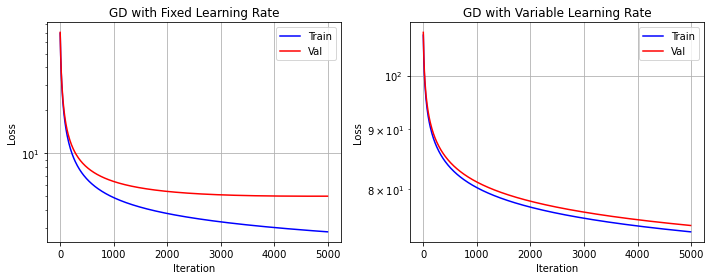

In [19]:
iterations = 5000        # Lots of iterations to see the training error go down.
m = 10                   # Get the loss every m iterations.

# TO DO: Set the learning rate.
lr = 0.001               # You choose this value, try something small.



## Store the loss values in these arrays.
# Fixed learning rate.
train_loss_fixed = np.zeros(iterations//m)
val_loss_fixed = np.zeros(iterations//m)

# Variable learning rate.
train_loss_var = np.zeros(iterations//m)
val_loss_var = np.zeros(iterations//m)


# Set the initial values, either randomly or some fixed value.
w1 = np.zeros(X_train.shape[1]) #basically setting to the number of training examples
w2 = np.zeros(X_train.shape[1])

# Write the loss function as a function of the parameter only.
J = grad(lambda w: loss(w, X_train, y_train))


for i in tqdm(range(iterations)):
    # Get the updated parameters from gradient descent with a fixed learning rate.
    w1 = gd_fixed(J, w1, lr)
    # Get the updated parameters from gradient descent with a variable learning rate.
    # Hint: You may either modify the gd_variable function above or call gd_fixed with a different learning rate.
    w2 = gd_variable(J, w2, lr, i)
    
    # Only compute the loss every m iterations.
    if np.mod(iterations, m) == 0: 
        # Compute the training and validation loss of the parameters found with the fixed learning rate.
        train_loss_fixed[i//m] = loss(w1, X_train, y_train)
        val_loss_fixed[i//m] = loss(w1, X_val, y_val)
        # Compute the training and validation loss of the parameters found with a variable learning rate.
        train_loss_var[i//m] = loss(w2, X_train, y_train)
        val_loss_var[i//m] = loss(w2, X_val, y_val)

print(w1, w2)
## Plotting starts here.  Nothing to implement.
its = np.arange(1, iterations + 1, m)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))

ax1.semilogy(its, train_loss_fixed, 'b-', label = 'Train')
ax1.semilogy(its, val_loss_fixed, 'r-', label = 'Val')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Loss')
ax1.set_title('GD with Fixed Learning Rate')
ax1.grid()
ax1.legend()

ax2.semilogy(its, train_loss_var, 'b-', label = 'Train')
ax2.semilogy(its, val_loss_var, 'r-', label = 'Val')
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Loss')
ax2.set_title('GD with Variable Learning Rate')
ax2.grid()
ax2.legend()

plt.tight_layout();

### P3.e: Evalute the model on the test set (5 points)

Finally, we have trained our models and are ready to evaluate them on the test set. But first we need to define a discriminant function $f(x)$ which converts probabilities into discrete classes. It assigns the label $y = 1$ if $p(y = 1 | x) \ge 0.5$ and $0$ otherwise. In other words, with a discriminant function we do not need the posterior probabilities but rather skip straight to the classification. Implement this discremenant function, infer the class for every point in the test set, and compute the following metric. 

For binary classification one way to check our classifier is to make a *confusion matrix* of our predictions.

$$
C = \begin{bmatrix}
\text{Predict 0, Actual 0} & \text{Predict 0, Actual 1}\\
\text{Predict 1, Actual 0} & \text{Predict 1, Actual 1}
\end{bmatrix}
$$

The diagonal elements are the number of samples that are correctly classified.

Use both trained models (fixed and variable learning rates) to classify samples in the test set according to whether $h(x_i; w) \ge 0.5$ or not and print the confusion matrices. Also print the accuracy rate which is just the percentage of correctly classified examples for both models.





In [20]:
C1 = np.zeros((2, 2)) # Confusion matrix for fixed learning rate.
C2 = np.zeros((2, 2)) # Confusion matrix for variable learning rate.
N = len(X_test)       # Number of test samples.


## TO DO STARTS HERE:

def predict_reg(X, w):
    return (logistic_unit(X, w)>0.5).astype(int)

test_y_f = predict_reg(X_test, w1)
test_y_v = predict_reg(X_test, w2)

FP_fixed = sum([1 if (i==1) and (j==0)  else 0 for i, j in zip(test_y_f, y_test)])
TP_fixed = sum([1 if (i==1) and (j==1)  else 0 for i, j in zip(test_y_f, y_test)])
FN_fixed = sum([1 if (i==0) and (j==1)  else 0 for i, j in zip(test_y_f, y_test)])
TN_fixed = sum([1 if (i==0) and (j==0)  else 0 for i, j in zip(test_y_f, y_test)])

FP_var = sum([1 if (i==1) and (j==0)  else 0 for i, j in zip(test_y_v, y_test)])
TP_var = sum([1 if (i==1) and (j==1)  else 0 for i, j in zip(test_y_v, y_test)])
FN_var = sum([1 if (i==0) and (j==1)  else 0 for i, j in zip(test_y_v, y_test)])
TN_var = sum([1 if (i==0) and (j==0)  else 0 for i, j in zip(test_y_v, y_test)])

C1 = [[TN_fixed, FN_fixed],
    [FP_fixed, TP_fixed]]
C2 = [[TN_var, FN_var],
    [FP_var, TP_var]]

# Compute the accuracy         
acc1 = (TP_fixed + TN_fixed)/N
acc2 = (TP_var + TN_var)/N

# TO DO ENDS HERE.
print("C_1 = ")
print(C1)
print("C_2 = ")
print(C2)
print('Fixed Learning Rate Accuracy    = {:0.1f}%'.format(100 * acc1))
print('Variable Learning Rate Accuracy = {:0.1f}%'.format(100 * acc2))

C_1 = 
[[51, 3], [1, 45]]
C_2 = 
[[51, 1], [1, 47]]
Fixed Learning Rate Accuracy    = 96.0%
Variable Learning Rate Accuracy = 98.0%
